# Looking at Data Distributions

When faced with a dataset that you are seeing for the first time, one of the first things that you should do is to plot distributions of its columns. 

What information can we make out of data distributions?

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
# read and process the tracks dataset
tracks_df = pd.read_csv('data/spotify_daily_charts.csv')
tracks_df.head()

,date,position,track_id,track_name,artist,streams
0,2017-01-01,1,0kN8xEmgMW9mh7UmDYHlJP,Versace on the Floor,Bruno Mars,185236
1,2017-01-01,2,5uCax9HTNlzGybIStD3vDh,Say You Won't Let Go,James Arthur,180552
2,2017-01-01,3,7BKLCZ1jbUBVqRi2FVlTVw,Closer,The Chainsmokers,158720
3,2017-01-01,4,2rizacJSyD9S1IQUxUxnsK,All We Know,The Chainsmokers,130874
4,2017-01-01,5,5MFzQMkrl1FOOng9tq6R9r,Don't Wanna Know,Maroon 5,129656


In [19]:
tracks_df[tracks_df['artist']=='SB19'].sort_values('position')

,date,position,track_id,track_name,artist,streams
331803,2021-07-22,4,6Fz2TpxUD0YvAPsuG8nDMJ,MAPA,SB19,241724
332004,2021-07-23,5,6Fz2TpxUD0YvAPsuG8nDMJ,MAPA,SB19,224418
332404,2021-07-25,5,6Fz2TpxUD0YvAPsuG8nDMJ,MAPA,SB19,197500
332204,2021-07-24,5,6Fz2TpxUD0YvAPsuG8nDMJ,MAPA,SB19,202902
327607,2021-07-01,8,6Fz2TpxUD0YvAPsuG8nDMJ,MAPA,SB19,179267
...,...,...,...,...,...,...
199798,2019-09-29,199,5Gm6YoDs8N2WznOpASSB5P,Go Up,SB19,23186
218799,2020-01-02,200,3fNpKcMrEDrnjahY9kN5fQ,Alab (Burning),SB19,23599
389799,2022-05-07,200,6Fz2TpxUD0YvAPsuG8nDMJ,MAPA,SB19,32105
199199,2019-09-26,200,5Gm6YoDs8N2WznOpASSB5P,Go Up,SB19,26538


### 2. EXERCISE: Get a grasp of all possible values in each column
1. Get length of all unique entries in each columns with string (dtype: object) and int type
> Q: Why are there more track ids than track names? List all possible reasons you could think.
2. Using `describe`, generate a table of basic statistics for the audio features columns of type float
> Q: Give 3 insights based on the output of `describe`
3. Confirm if the range (range = max - min) of the audio features columns (danceability, energy, ...) matches what is declared in the documentation 

In [25]:
#How many unique track ids are there?
tracks_df['track_id'].nunique()

4255

In [26]:
#How many unique tracks names are there?
tracks_df['track_name'].nunique()

3305

In [28]:
#How many unique album ids are there?
len(tracks_df['album_id'].unique())

2779

In [29]:
#What are the values present in the column "key"? Is it consistent with the documentation?
tracks_df['key'].unique()

array([ 2., 10.,  8.,  0.,  7.,  1.,  4.,  9.,  6., 11.,  5.,  3., nan])

In [30]:
#What are the values present in the column "mode"? Is it consistent with the documentation?
tracks_df['mode'].unique()

array([ 1.,  0., nan])

In [ ]:
#Generate stats of audio features using describe 
#Write code here

In [31]:
tracks_df = tracks_df.dropna()

In [34]:
tracks_df['key'].unique()

array([ 2., 10.,  8.,  0.,  7.,  1.,  4.,  9.,  6., 11.,  5.,  3.])

### 3. Histograms
We can now try to plot histograms of the datasets
Put simply, histograms are graphical representation of tallies.
Read more about histograms here: (https://statistics.laerd.com/statistical-guides/understanding-histograms.php).

These are very useful in EDA because at a glance, you could already see how the data is spread over its range.

In particular, you should look out for:
1. Skewness - Do the values peak around the mean, or over lower (left-skewed)/higher values(right-skewed)?
2. Mode - Does it have one peak (unimodal)? two peaks (bimodal)? How many peaks?
3. Outliers - Are there a few data points that are substantially distant from bulk of all values?

It is **strongly advised** that you look at histograms before you aggregate, or plug in any variable in any model.

> Q: Modify the code below to plot histograms for all the numeric columns in df. For each histogram, create a markdown cell below and write a 1-3 sentence about what you observe in the plot.

In [36]:
#make duration ms to minutes
tracks_df['duration_mins']=tracks_df['duration']/60000

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


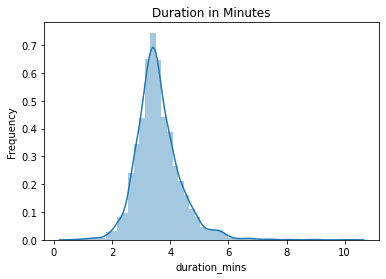

In [37]:
sns.distplot(tracks_df['duration_mins'])
plt.title('Duration in Minutes')
plt.ylabel('Frequency')
plt.show()
#sometimes the line might not fit the histogram bars. 
#these are called Gaussian Kernel Density Estimations and we dont expect them to work for noncontinuous values

Most tracks in the Top 200 tend to last around 3-4 mins. There are more songs that last longer than 4 mins than songs that are shorter than 2.5 mins.

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


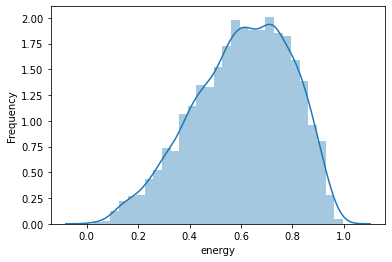

In [47]:
#Plot histogram of a chosen audio feature
#Write code here 
sns.distplot(tracks_df['energy'])
plt.ylabel('Frequency')
plt.show()

## 4. Distribution Properties
### Skewness - tells you where the tail is
[Skewness](https://towardsdatascience.com/testing-for-normality-using-skewness-and-kurtosis-afd61be860) lets you test by how much the overall shape of a distribution deviates from the shape of the normal distribution.
   - A **positive skew** (skew > 0) indicates that the tail is on the *right* side of the distribution, which extends towards more positive values.(right-tailed/right-modal)
   - A **negative skew** (skew < 0) indicates that the tail is on the *left* side of the distribution, which extends towards more negative values.(left-tailed/left-modal)
   - Skew = 0 indicates that there is no skewness in the distribution at all, meaning the distribution is perfectly symmetrical.

<div>
<img src="https://www.conversion-uplift.co.uk/wp-content/uploads/2020/06/Skewness-photo.png" width="500"/>
</div>

In [39]:
from scipy.stats import skew, kurtosis

In [40]:
skew(tracks_df['energy'])

-0.3888622110262673

In [41]:
def skew_type(skewval, skewthres):
    test_skew_value = abs(skewval)-skewthres    
    if (test_skew_value > 0) & (np.sign(skewval)>0):
        return "right-tailed"
    elif  (test_skew_value > 0) & (np.sign(skewval)<0):
        return "left-tailed"
    else:
        return "approximately symmetric"

In [42]:
for col in ['popularity', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo']:
    print("Skewness of variable %s : %0.2f (%s)" % (col, skew(tracks_df[col]), skew_type(skew(tracks_df[col]),0.1)))


Skewness of variable popularity : -0.54 (left-tailed)
Skewness of variable danceability : -0.41 (left-tailed)
Skewness of variable energy : -0.39 (left-tailed)
Skewness of variable key : 0.03 (approximately symmetric)
Skewness of variable loudness : -1.15 (left-tailed)
Skewness of variable mode : -0.77 (left-tailed)
Skewness of variable speechiness : 2.91 (right-tailed)
Skewness of variable acousticness : 0.95 (right-tailed)
Skewness of variable instrumentalness : 9.40 (right-tailed)
Skewness of variable liveness : 2.38 (right-tailed)
Skewness of variable valence : 0.22 (right-tailed)
Skewness of variable tempo : 0.54 (right-tailed)


### Kurtosis - tells you how thick the tail is
[Kurtosis](https://towardsdatascience.com/testing-for-normality-using-skewness-and-kurtosis-afd61be860) is a measure of how differently shaped are the tails of a distribution as compared to the tails of the normal distribution. While skewness focuses on the overall shape, Kurtosis focuses on the tail shape.

![Kurtosis](https://external-content.duckduckgo.com/iu/?u=http%3A%2F%2Fimg.tfd.com%2Fmk%2FK%2FX2604-K-11.png&f=1&nofb=1)

- The kurtosis of a normal distribution is 3.
- If kurtosis<3, it is said to be *playkurtic*, which means it tends to produce fewer and less extreme outliers than the normal distribution.
- If kurtosis>3, it is said to be *leptokurtic*, which means it tends to produce more outliers than the normal distribution.

In [44]:
kurtosis(tracks_df['energy'])

-0.46882948397423974

In [45]:
def kurtosis_type(kurtval, kurtthres):
    test_kurtosis_value = abs(kurtval-kurtthres)
    #in scipy's implementation, 3 is subtracted from the original definition of kurtosis   
    if (test_kurtosis_value > 0) & (np.sign(kurtval)>0):
        return "heavy-tailed"
    elif  (test_kurtosis_value  > 0) & (np.sign(kurtval)<0):
        return "light-tailed"
    else:
        return "approximately normal"

In [46]:
for col in ['popularity', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo']:
    THRES = 0.1
    print("Kurtosis of variable %s : %0.2f (%s)" % \
          (col, kurtosis(tracks_df[col]), kurtosis_type(kurtosis(tracks_df[col]),THRES)))


Kurtosis of variable popularity : -1.18 (light-tailed)
Kurtosis of variable danceability : -0.10 (light-tailed)
Kurtosis of variable energy : -0.47 (light-tailed)
Kurtosis of variable key : -1.28 (light-tailed)
Kurtosis of variable loudness : 2.34 (heavy-tailed)
Kurtosis of variable mode : -1.40 (light-tailed)
Kurtosis of variable speechiness : 11.31 (heavy-tailed)
Kurtosis of variable acousticness : -0.32 (light-tailed)
Kurtosis of variable instrumentalness : 93.59 (heavy-tailed)
Kurtosis of variable liveness : 7.27 (heavy-tailed)
Kurtosis of variable valence : -0.73 (light-tailed)
Kurtosis of variable tempo : -0.12 (light-tailed)


## Try it yourself!
Pick an artist and compare each of the audio features distribution of his/her songs to all the charting tracks in the whole time period. What does this say about the artist?

### Resources
More details on skewness and kurtosis [here](https://codeburst.io/2-important-statistics-terms-you-need-to-know-in-data-science-skewness-and-kurtosis-388fef94eeaa) and [here](https://brownmath.com/stat/shape.htm)

